# Fully-connected Networks for Number Recognition

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

# Prepare the data

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (784,)

# flatten the data from 28*28 to 1*784
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Build the model

In [13]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [14]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.2)


Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.8347 - val_loss: 0.2930 - val_accuracy: 0.9190
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3104 - accuracy: 0.9112 - val_loss: 0.2890 - val_accuracy: 0.9217
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2931 - accuracy: 0.9174 - val_loss: 0.2832 - val_accuracy: 0.9227
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2836 - accuracy: 0.9215 - val_loss: 0.2894 - val_accuracy: 0.9208
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2781 - accuracy: 0.9231 - val_loss: 0.2853 - val_accuracy: 0.9236
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9251 - val_loss: 0.2951 - val_accuracy: 0.9187
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.9217 - val_loss: 0.2876 - val_accuracy: 0.9222
Epoch 

# Plot the training history 

In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


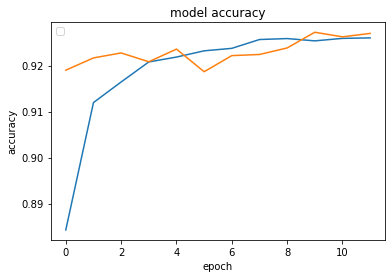

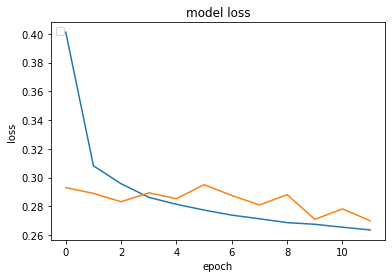

In [18]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Evaluate the trained model

In [19]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.27434462308883667
Test accuracy: 0.9240999817848206


# Changing model parameters: Add rectified activation function

In [21]:

# add rectified activation in the first hidden layer
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [22]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.2)


Epoch 1/12
375/375 [==============================] - 2s 3ms/step - loss: 0.5380 - accuracy: 0.8479 - val_loss: 0.1723 - val_accuracy: 0.9510
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1573 - accuracy: 0.9542 - val_loss: 0.1279 - val_accuracy: 0.9622
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9700 - val_loss: 0.1008 - val_accuracy: 0.9702
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9783 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0540 - accuracy: 0.9852 - val_loss: 0.0866 - val_accuracy: 0.9741
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0844 - val_accuracy: 0.9761
Epoch 7/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.0799 - val_accuracy: 0.9772
Epoch 

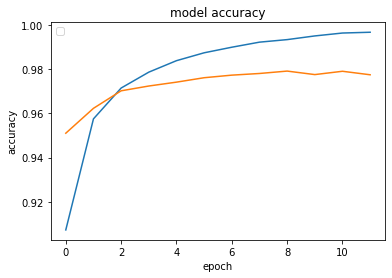

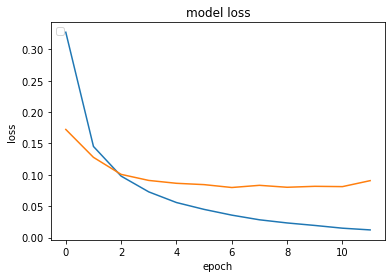

In [23]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# What is the effect for generalisation?

how this training history differs from the previous model, for the training and validation sets. Describe what this tells us about the generalisation of the model.

# Image show the Training Image

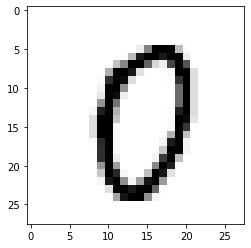

In [3]:
n = 1000
plt.imshow(x_train[n], cmap='Greys')

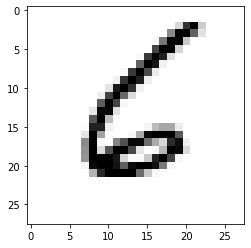

In [6]:
n = 10101
plt.imshow(x_train[n], cmap='Greys')